# Exponential Smoothing Exercise

## PSMA 2020

In [72]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing
from statsmodels.tsa.seasonal import STL

from sklearn.metrics import mean_absolute_error

## Simple Exponential Smoothing

### Step by Step Worked Example of using SES

**Step 1.1. Read the data into a pandas DataFrame**

The first thing we will do is read in the data from the file `Nile.csv`

To do this we will call the method:

```python 
pd.read_csv()
```

 
Remember that you need to pass in three keyword arguments.
* filepath_or_buffer - e.g. is the directory/filename.csv
* index_col - the name of the column that contains the date/time information
* parse_dates = True



In [6]:
#read in Nile Data
nile = pd.read_csv('data/nile.csv', index_col='year', parse_dates=True)

In [57]:
#how manay observations in the time series?
nile.shape

(60, 4)

In [14]:
#let's have a look at the first 5 observations
nile.head(5)

,flow,time,level,trend
year,,,,
1871-01-01,3533.916667,1,0,0
1872-01-01,3664.250000,2,0,0
1873-01-01,3047.500000,3,0,0
1874-01-01,3808.583333,4,0,0
1875-01-01,3677.500000,5,0,0


**Step 1.2: Set the frequency of the data**
  
When you read datetime data in from file it is always worth checking that pandas has set the frequency correctly.  Let's have a look this for the nile data.

In [15]:
nile.index

DatetimeIndex(['1871-01-01', '1872-01-01', '1873-01-01', '1874-01-01',
               '1875-01-01', '1876-01-01', '1877-01-01', '1878-01-01',
               '1879-01-01', '1880-01-01', '1881-01-01', '1882-01-01',
               '1883-01-01', '1884-01-01', '1885-01-01', '1886-01-01',
               '1887-01-01', '1888-01-01', '1889-01-01', '1890-01-01',
               '1891-01-01', '1892-01-01', '1893-01-01', '1894-01-01',
               '1895-01-01', '1896-01-01', '1897-01-01', '1898-01-01',
               '1899-01-01', '1900-01-01', '1901-01-01', '1902-01-01',
               '1903-01-01', '1904-01-01', '1905-01-01', '1906-01-01',
               '1907-01-01', '1908-01-01', '1909-01-01', '1910-01-01',
               '1911-01-01', '1912-01-01', '1913-01-01', '1914-01-01',
               '1915-01-01', '1916-01-01', '1917-01-01', '1918-01-01',
               '1919-01-01', '1920-01-01', '1921-01-01', '1922-01-01',
               '1923-01-01', '1924-01-01', '1925-01-01', '1926-01-01',
      

This shows that the frequency of the datetimeindex is set to None.  We need to set this to the correct frequency in order to for the statsmodels Exponential Smoothing methods to work correctly.  In this case we have annual data.  We are going to use the frequency 'AS' which starts for Annual Start.

In [16]:
nile.index.freq = "AS"

**Step 1.3. Train-Test Split**

We are going to hold back the final 10 observations and attempt to predict them using SES

In [54]:
HOLDOUT_OBS = 10
train, test = nile.iloc[:-HOLDOUT_OBS:], nile.iloc[-HOLDOUT_OBS:]

In [55]:
#we should have 60 - HOLDOUT_OBS data points for training
train.shape

(50, 4)

In [56]:
#we should have HOLDOUT_OBS data points for testing
test.shape

(10, 4)

**Step 1.4. Visualise the data**

The easiest way to do this is to call the `.plot()` method of the `DataFrame`

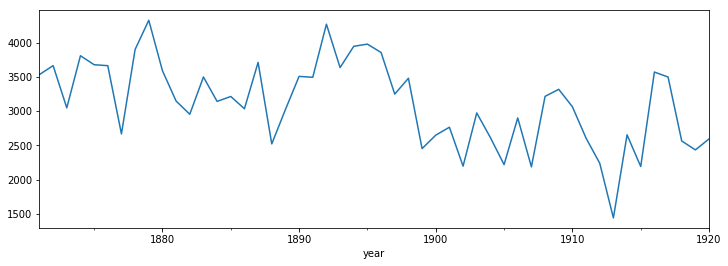

In [61]:
train['flow'].plot(figsize=(12,4));

**Step 1.5. Decide what forecasting method to try based on the time series features in the data**

It is unclear if there is a trend or seasonality in the nile time series.  This is also annual data which does not offer an obvious period for seasonality like monthly or quarterly data.  One option would be to use a Naive Forecast to set a baseline, but here we will use Simple Exponential Smoothing as that is suitable for data without trend or seasonality

**Step 1.6. Create an instance of an `ExponentialSmoothing` object for SES**

In [62]:
#for SES pass in the endog argument as your data - that's it!
model_ses = ExponentialSmoothing(endog=train['flow'])

**Step 1.7. Fit the model to the training data**

Before we can forecast, we first need to fit the model to the data in order to estimate the smoothing parameter $\alpha$.  To do this you need to call the `.fit()` method of the model.

In [63]:
results_ses = model_ses.fit()

**Step 1.8. Forecast!**

With an `ExponentialSmoothing` object for SES you need to call two methods to get the forecast and prediction intervals.


In [64]:
#a variable to store how far ahead we will forecast
#in this case 10 years of nile flow.
HORIZON=10  

#the create the forecast call the get_forecast method like so.
#the method returns a results object that contains your forecasts.
forecast = results_ses.get_forecast(steps=HORIZON)

In [65]:
#the forecast.summary_frame() method returns a pandas data frame.
#here alpha refers to alpha for a prediction interval 0.2 = 80% pred interval.
#make sure you don't confuse this alpha with the SES smoothing parameter!
forecast.summary_frame(alpha=0.2)

flow,mean,mean_se,mean_ci_lower,mean_ci_upper
1921-01-01,2672.965892,537.219297,1984.491661,3361.440123
1922-01-01,2672.965892,565.046204,1948.830045,3397.101739
1923-01-01,2672.965892,591.565594,1914.844079,3431.087704
1924-01-01,2672.965892,616.946100,1882.317651,3463.614133
1925-01-01,2672.965892,641.322953,1851.077458,3494.854326
1926-01-01,2672.965892,664.806565,1820.981998,3524.949786
1927-01-01,2672.965892,687.488479,1791.913956,3554.017828
1928-01-01,2672.965892,709.445592,1763.774783,3582.157001
1929-01-01,2672.965892,730.743243,1736.480745,3609.451039
1930-01-01,2672.965892,751.437506,1709.959979,3635.971805


The dataframe contains your 10 step forecast.  For each time horizon you have the information on the forecast distribution.  It's mean (which is a constant level in Simple Exponential Smoothing), the standard error of the mean at that step and the lower and upper prediction intervals.

**Step 1.9. Plot the forecast**

The matplotlib code to plot the forecast has been provided for you. 

In [49]:
def plot_forecast(ts, fitted_values, forecast):

    #plot the fitted values and prediction
    ax = ts.plot(figsize=(12,4))
    forecast_80 = forecast.summary_frame(alpha=0.2)[['mean', 'mean_ci_lower', 'mean_ci_upper']]
    forecast_90 = forecast.summary_frame(alpha=0.1)[['mean', 'mean_ci_lower', 'mean_ci_upper']]


    ax.fill_between(forecast_90.index,forecast_90['mean_ci_lower'], forecast_90['mean_ci_upper'], 
                    alpha=0.5,
                    label='90% PI');

    ax.fill_between(forecast_80.index,forecast_80['mean_ci_lower'], forecast_80['mean_ci_upper'], 
                    alpha=0.5,
                    label='80% PI');

    forecast_80['mean'].plot(ax=ax, label='forecast', color='red');

    fitted_values.plot(ax=ax, label='fitted', color='green', linestyle='--')

    ax.legend(loc=3);

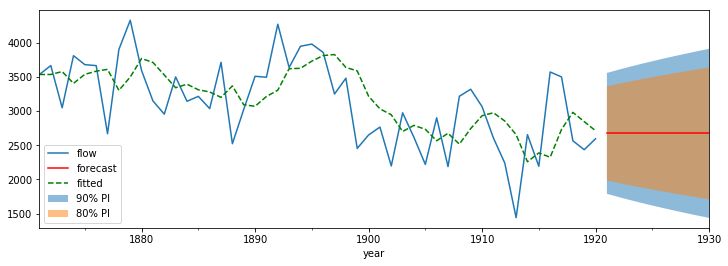

In [67]:
plot_forecast(train['flow'], results_ses.fittedvalues, forecast)

**Step 1.10 Evaluate forecast accuracy**

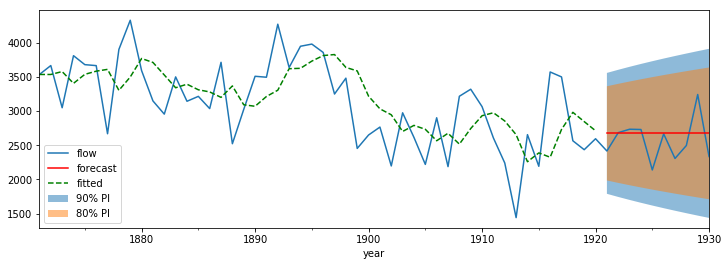

In [70]:
plot_forecast(nile['flow'], results_ses.fittedvalues, forecast)

In [71]:
mean_absolute_error(y_true=test['flow'], y_pred=forecast.summary_frame()['mean'])

237.818178294958

**Questions to think about on your own**
* What do you think of the forecast? 
* Do you think the model was certain or uncertain about its forecast?  Why?

### **Here is the full code listing for the SES example**

SES MAE:237.82


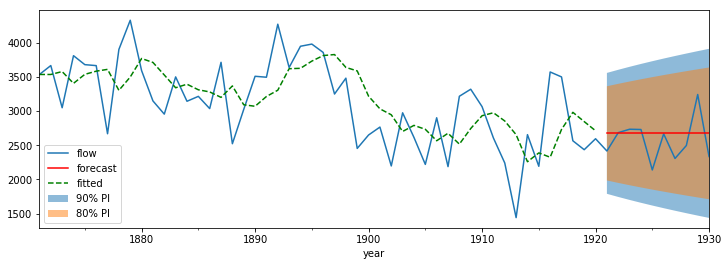

In [80]:
#read in Nile Data
nile = pd.read_csv('data/nile.csv', index_col='year', parse_dates=True)
nile.index.freq = "AS"

#train-test split
HOLDOUT_OBS = 10
train, test = nile.iloc[:-HOLDOUT_OBS:], nile.iloc[-HOLDOUT_OBS:]

#for SES pass in the endog argument as your data - that's it!
model_ses = ExponentialSmoothing(endog=train['flow'])
results_ses = model_ses.fit()

#a variable to store how far ahead we will forecast
#in this case 10 years of nile flow.
HORIZON=10  

#the create the forecast call the get_forecast method like so.
#the method returns a results object that contains your forecasts.
forecast = results_ses.get_forecast(steps=HORIZON)

plot_forecast(nile['flow'], results_ses.fittedvalues, forecast)

error = mean_absolute_error(y_true=test['flow'], y_pred=forecast.summary_frame()['mean'])
print(f'SES MAE:{error:.2f}')
